In [271]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [272]:
data = pd.read_csv('Datasets/STS.csv')
# show the first 5 rows of the data
data.head()

,Index,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,AverageScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.00
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88,82.33
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.33
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42,47.67
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75,76.33


In [273]:
# Drop Index, MathScore, ReadingScore, WritingScore
data = data.drop(['Index', 'MathScore', 'ReadingScore', 'WritingScore'], axis=1)
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,AverageScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,72.00
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,82.33
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,90.33
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,47.67
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76.33


In [274]:
# Check for missing values
data.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
AverageScore              0
dtype: int64

In [275]:
# Fill missing values with the most frequent value
data = data.fillna(data.mode().iloc[0])
data.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
AverageScore           0
dtype: int64

In [276]:
# Check for duplicates
data.duplicated().sum()

132

In [277]:
# Drop duplicates
data = data.drop_duplicates()
data.duplicated().sum()

0

Text(0.5, 1.0, 'Distribution of the Average scores')

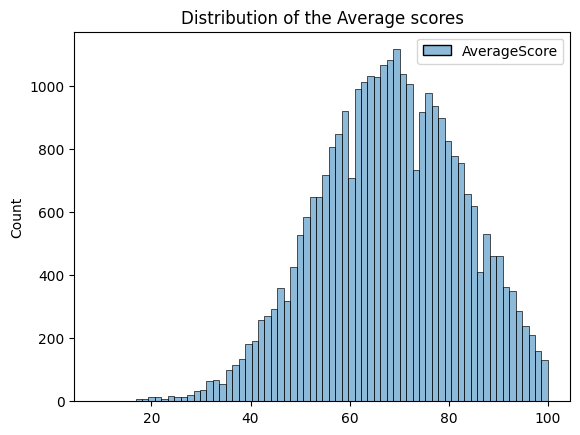

In [278]:
sns.histplot(data[['AverageScore']])
plt.title('Distribution of the Average scores')

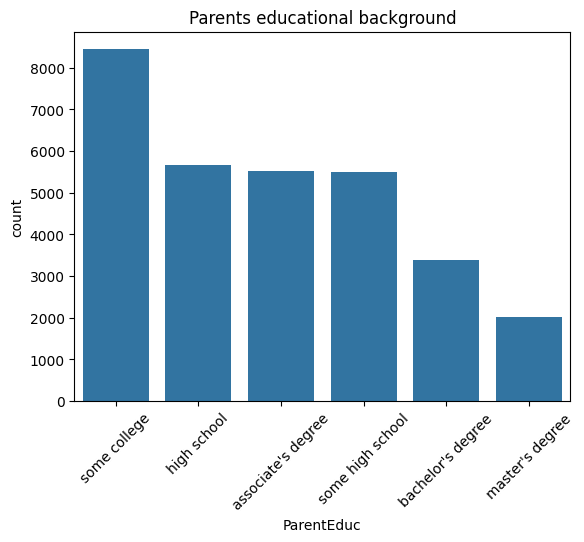

In [279]:
sns.countplot(x=data['ParentEduc'], order=['some college', 'high school', "associate's degree", 'some high school', "bachelor's degree", "master's degree"])
plt.title('Parents educational background')
plt.xticks(rotation=45);

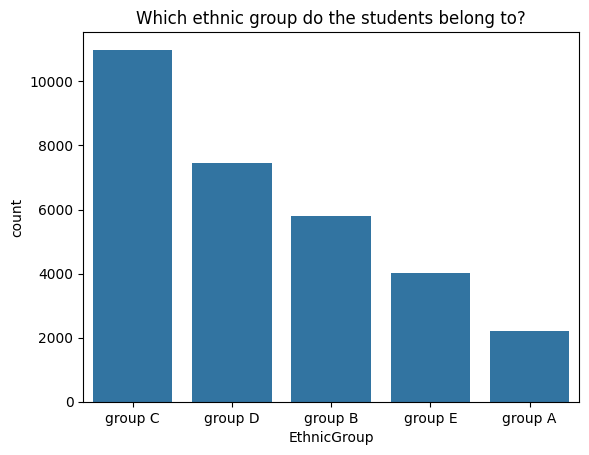

In [280]:
sns.countplot(x=data['EthnicGroup'], order=['group C', 'group D', 'group B', 'group E', 'group A'])
plt.title('Which ethnic group do the students belong to?');

In [281]:
# make average score categorical
# data['AverageScore'] = pd.cut(data['AverageScore'], bins=[0, 20, 40, 60, 80, 100], labels=['F', 'D', 'C', 'B', 'A'])

In [282]:
# lable encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [283]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,AverageScore
0,0,2,1,1,1,1,1,1,3.0,1,1,72.00
1,0,2,4,1,1,1,2,1,0.0,1,0,82.33
2,0,1,3,1,1,2,2,1,4.0,1,1,90.33
3,1,0,0,0,1,1,0,0,1.0,1,0,47.67
4,1,2,4,1,1,1,2,1,0.0,1,0,76.33


In [284]:
# build neural network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense

# Split the data into features and target
X = data.drop(['AverageScore'], axis=1)
y = data['AverageScore']

# One hot encode the categorical features
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [285]:
# Build the neural network
model = Sequential()

# 4 layers with 128, 64, 32, 16 neurons
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [286]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
763/763 [==============================] - 3s 2ms/step - loss: 477.7707
Epoch 2/20
763/763 [==============================] - 1s 1ms/step - loss: 171.9842
Epoch 3/20
763/763 [==============================] - 1s 1ms/step - loss: 168.8812
Epoch 4/20
763/763 [==============================] - 1s 2ms/step - loss: 167.5225
Epoch 5/20
763/763 [==============================] - 1s 2ms/step - loss: 166.6174
Epoch 6/20
763/763 [==============================] - 1s 2ms/step - loss: 167.2643
Epoch 7/20
763/763 [==============================] - 1s 2ms/step - loss: 165.6096
Epoch 8/20
763/763 [==============================] - 1s 2ms/step - loss: 165.9192
Epoch 9/20
763/763 [==============================] - 1s 2ms/step - loss: 165.8778
Epoch 10/20
763/763 [==============================] - 1s 1ms/step - loss: 164.8821
Epoch 11/20
763/763 [==============================] - 1s 2ms/step - loss: 165.6264
Epoch 12/20
763/763 [==============================] - 1s 2ms/step - loss: 164.2371
E

In [287]:
# Make predictions
y_pred = model.predict(X_test)

191/191 [==============================] - 0s 1ms/step


In [288]:
# reshape the predictions
y_pred = y_pred.reshape(y_pred.shape[0])

In [289]:
# Evaluate the model
print('Root Mean Squared Error:', np.sqrt(np.mean((y_test - y_pred) ** 2)))
print('Mean Absolute Error:', np.mean(np.abs(y_test - y_pred)))
# print('accuracy_score:', accuracy_score(y_test, y_pred))
# print('precision_score:', precision_score(y_test, y_pred, average='weighted'))
# print('recall_score:', recall_score(y_test, y_pred, average='weighted'))
# print('f1_score:', f1_score(y_test, y_pred, average='weighted'))

Root Mean Squared Error: 12.870192238563542
Mean Absolute Error: 10.445428243691474


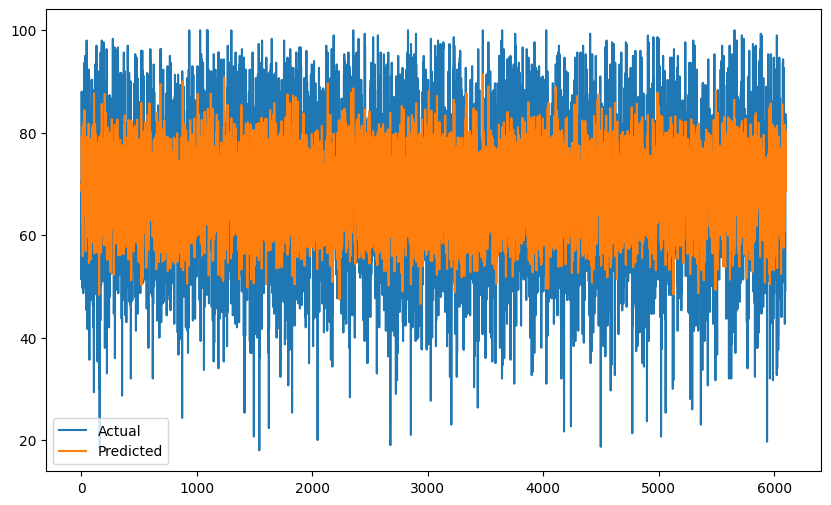

In [290]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()